In [13]:
#Import of libraries and data preprocessing.
!python3 -m pip install scikit-learn tensorflow numpy pandas matplotlib keras

import tensorflow as tf
from keras.models import Model
from keras.layers import Dropout, Dense, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df = pd.read_csv("../assets/risk_profiles.csv")
df.drop(["total_score"], axis=1, inplace=True)

m_data = np.array(df)

X = np.zeros((2000, 5))
Y = [0] * 2000
for i in range(2000):
    X[i] = m_data[i, :5] #this syntax for numPy shows [row, col]
    Y[i] = m_data[i, 5]

label_convert = LabelEncoder()
fitted_Y = label_convert.fit(Y)
converted_Y = label_convert.transform(Y)  

print("Class index mapping:")
for idx, label in enumerate(label_convert.classes_):
    print(f"{idx} → {label}")
    
Y = to_categorical(converted_Y).astype(float) 


Defaulting to user installation because normal site-packages is not writeable
Class index mapping:
0 → Aggressive
1 → Conservative
2 → Moderate


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5418 - loss: 1.1522 - val_accuracy: 0.3275 - val_loss: 7.2002
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.7415 - loss: 0.5794 - val_accuracy: 0.3275 - val_loss: 18.3675
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.8036 - loss: 0.4355 - val_accuracy: 0.3275 - val_loss: 30.7864
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.8177 - loss: 0.4275 - val_accuracy: 0.3275 - val_loss: 37.6004
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8582 - loss: 0.3336 - val_accuracy: 0.3275 - val_loss: 45.0654
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8831 - loss: 0.3048 - val_accuracy: 0.3275 - val_loss: 49.1105
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8690 - loss: 0.3014 - val_accuracy: 0.3275 - val_loss: 50.1174
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8703 - loss: 0.3213 - val_

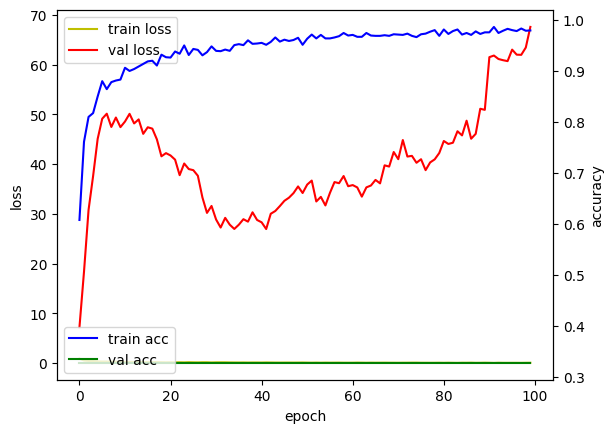

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy = 32.75%
              precision    recall  f1-score   support

  Aggressive       0.33      1.00      0.49       131
Conservative       0.00      0.00      0.00       106
    Moderate       0.00      0.00      0.00       163

    accuracy                           0.33       400
   macro avg       0.11      0.33      0.16       400
weighted avg       0.11      0.33      0.16       400



In [14]:
#Custom Model
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

custom_model = Sequential()
custom_model.add(Dense(32, activation='relu', input_dim = 5))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.2))
custom_model.add(Dense(64, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.2))
custom_model.add(Dense(32, activation='relu'))
custom_model.add(Dense(3, activation='softmax')) 

custom_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
record = custom_model.fit(X_train_scaled, Y_train, epochs=100, batch_size=20, validation_data=(X_test, Y_test))

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(record.history['loss'], 'y', label='train loss')
loss_ax.plot(record.history['val_loss'], 'r', label='val loss')

acc_ax.plot(record.history['accuracy'], 'b', label='train acc')
acc_ax.plot(record.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Predictions
custom_pred = np.argmax(custom_model.predict(X_test), axis=1)

# True labels
custom_labeled_result = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(custom_labeled_result, custom_pred)
print(f"accuracy = {accuracy * 100:.2f}%")

print(classification_report(custom_labeled_result, custom_pred, target_names=label_convert.classes_))


In [15]:
import joblib

custom_model.save("nnmodel.h5")
joblib.dump(scaler, "nnscaler.pkl")
joblib.dump(label_convert, "nnencoder.pkl")

['nnencoder.pkl']